# Census income classification

Following are the steps we're going to cover:
1. Import libraries
2. Load dataset
3. Summarize dataset
4. Visualize dataset
5. Evaluate algorithms
6. Make predictions

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns

## 2. Load dataset

In [2]:
names = ['age','workclass','final-wt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hrs-per-week','native-country','income']
train = pd.read_csv('census_income_train.csv', header=None, names=names)
test = pd.read_csv('census_income_test.csv', header=None, names=names)

## 3. Summarize dataset

### 3.1 Dimensions of data

In [3]:
train.shape

(32561, 15)

In [4]:
test.shape

(16281, 15)

### 3.2 Peek of data

In [5]:
train.head()

,age,workclass,final-wt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test.head()

,age,workclass,final-wt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### 3.3 Statistical summary

In [7]:
train.describe()

,age,final-wt,education-num,capital-gain,capital-loss,hrs-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
test.describe()

,age,final-wt,education-num,capital-gain,capital-loss,hrs-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


### 3.4 Missing values

In [9]:
train.isnull().sum()

age               0
workclass         0
final-wt          0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hrs-per-week      0
native-country    0
income            0
dtype: int64

In [10]:
test.isnull().sum()

age               0
workclass         0
final-wt          0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hrs-per-week      0
native-country    0
income            0
dtype: int64

## 4. Visualize dataset
### 4.1 Univariate analysis
#### 4.1.1 Categorical variables

1. Workclass
2. Education
3. Marital-status
4. Occupation
5. Relationship
6. Race
7. Sex
8. Native-country

**1. Workclass**

In [11]:
print(train['workclass'].value_counts())
print("=============")
print(train['workclass'].value_counts(normalize=True))

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64


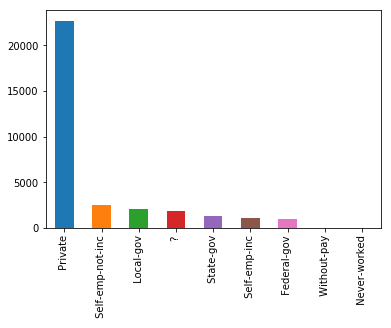

In [12]:
train['workclass'].value_counts().plot.bar()

Using above analysis, we can see 69.7% are "Private" working class. So this is not a good candidate for analysis. In future, for better analysis, we might split data with workclass="private" and workclass!="private" and do analysis on 2 train datasets.

**2. Education**

In [13]:
train['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [14]:
train['education'].value_counts(normalize=True)

 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64

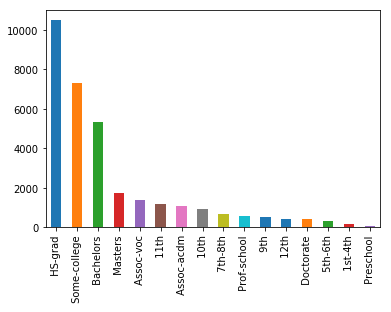

In [15]:
train['education'].value_counts().plot.bar()

'Education' can be a good candidate. Looking at above dataset, we can see that combination of 'HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc' comprises of 80% of dataset. So we could group multiple categories into broad categories and then try to visualize the dataset on the same. We can try to group 11th, Assoc-acdm, ... into 'Others' category. Let's add new column 'education-new' and have 'Others' for above categories.

In [16]:
edu_categories = ['HS-grad','Some-college','Bachelors','Masters','Assoc-voc']
def get_education_cat(edu_cat):
    edu_cat = edu_cat.strip()
    if edu_cat not in edu_categories:
        return 'Others'
    return (edu_cat)

train['education-new'] = train['education'].map(lambda x: get_education_cat(x))
test['education-new'] = test['education'].map(lambda x: get_education_cat(x))

In [17]:
train['education-new'].value_counts(normalize=True)

HS-grad         0.322502
Some-college    0.223918
Others          0.193759
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
Name: education-new, dtype: float64

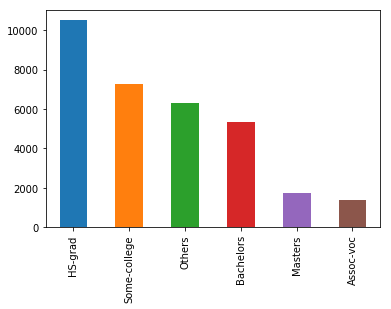

In [18]:
train['education-new'].value_counts().plot.bar()

**3. Marital-status**

In [19]:
train['marital-status'].value_counts(normalize=True)

 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: marital-status, dtype: float64

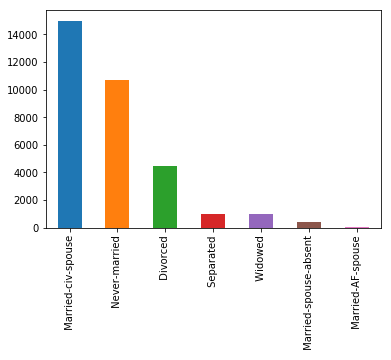

In [20]:
train['marital-status'].value_counts().plot.bar()

'Marital-status' have 3 categories comprising of ~90%, so we can introduce 'Others' similar to 'Education'. 

In [21]:
marital_status_categories = ['Married-civ-spouse','Never-married','Divorced']
def get_marital_status_cat(mar_stat_cat):
    mar_stat_cat = mar_stat_cat.strip()
    if mar_stat_cat not in marital_status_categories:
        return 'Others'
    return mar_stat_cat

train['marital-status-new'] = train['marital-status'].map(lambda x: get_marital_status_cat(x))

In [22]:
train['marital-status-new'].value_counts(normalize=True)

Married-civ-spouse    0.459937
Never-married         0.328092
Divorced              0.136452
Others                0.075520
Name: marital-status-new, dtype: float64

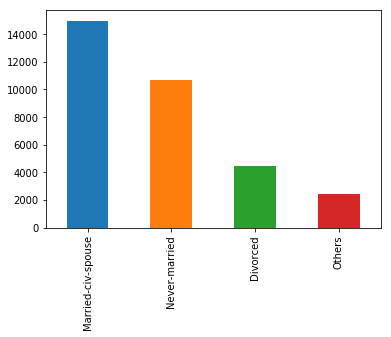

In [23]:
train['marital-status-new'].value_counts().plot.bar()

**4. Occupation**

In [24]:
train['occupation'].value_counts(normalize=True)

 Prof-specialty       0.127146
 Craft-repair         0.125887
 Exec-managerial      0.124873
 Adm-clerical         0.115783
 Sales                0.112097
 Other-service        0.101195
 Machine-op-inspct    0.061485
 ?                    0.056601
 Transport-moving     0.049046
 Handlers-cleaners    0.042075
 Farming-fishing      0.030527
 Tech-support         0.028500
 Protective-serv      0.019932
 Priv-house-serv      0.004576
 Armed-Forces         0.000276
Name: occupation, dtype: float64

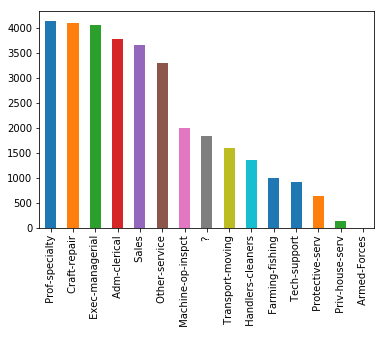

In [25]:
train['occupation'].value_counts().plot.bar()

**5. Relationship**

In [26]:
train['relationship'].value_counts(normalize=True)

 Husband           0.405178
 Not-in-family     0.255060
 Own-child         0.155646
 Unmarried         0.105832
 Wife              0.048156
 Other-relative    0.030128
Name: relationship, dtype: float64

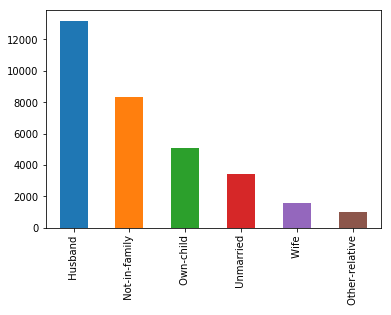

In [27]:
train['relationship'].value_counts().plot.bar()

**6. Race**

In [28]:
train['race'].value_counts(normalize=True)

 White                 0.854274
 Black                 0.095943
 Asian-Pac-Islander    0.031909
 Amer-Indian-Eskimo    0.009551
 Other                 0.008323
Name: race, dtype: float64

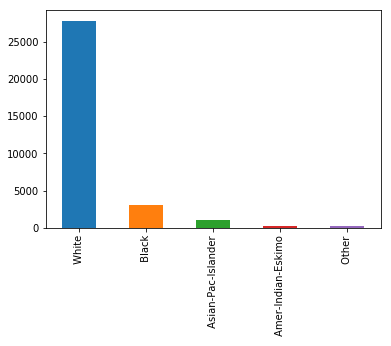

In [29]:
train['race'].value_counts().plot.bar()

~85% of 'race' consists one category 'White' and this is not a good candidate for analysis.  

**7. Sex**

In [30]:
train['sex'].value_counts(normalize=True)

 Male      0.669205
 Female    0.330795
Name: sex, dtype: float64

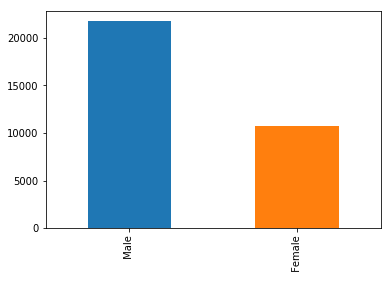

In [31]:
train['sex'].value_counts().plot.bar()

**8. Native-country**

In [32]:
train['native-country'].value_counts(normalize=True)

 United-States                 0.895857
 Mexico                        0.019748
 ?                             0.017905
 Philippines                   0.006081
 Germany                       0.004207
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003255
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China                         0.002303
 Italy                         0.002242
 Dominican-Republic            0.002150
 Vietnam                       0.002058
 Guatemala                     0.001966
 Japan                         0.001904
 Poland                        0.001843
 Columbia                      0.001812
 Taiwan                        0.001566
 Haiti                         0.001351
 Iran                          0.001321
 Portugal                      0.001136


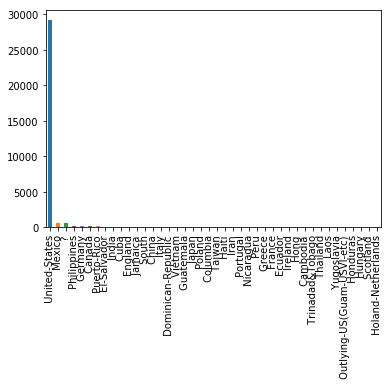

In [33]:
train['native-country'].value_counts().plot.bar()

'Native-country' doesn't seem to be a good candidate as ~90% values are just 1 value. 

**Final categorical variables to be considered**

In [53]:
categorical_cols = ['education-new','marital-status-new','occupation','relationship','sex']

#### 4.1.2 Continuous variables
1. Age
2. Final-wt
3. Education-num
4. Capital-gain
5. Capital-loss
6. Hrs-per-week

**1. Age**

C:\Users\Peeush Agarwal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


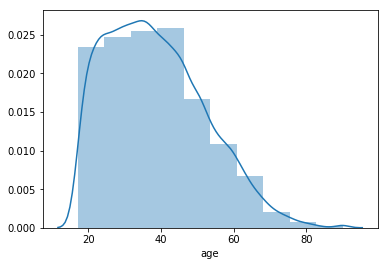

In [35]:
sns.distplot(train['age'], kde=True, bins=10)

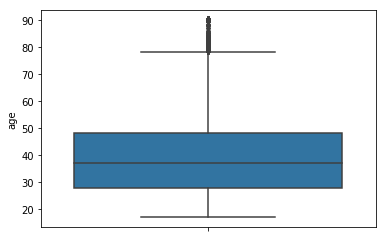

In [36]:
sns.boxplot(y='age', data=train)

From above plots, we can see 'age' is left-skewed distribution. It has outliers for age >= 75

**2. Final-wt**

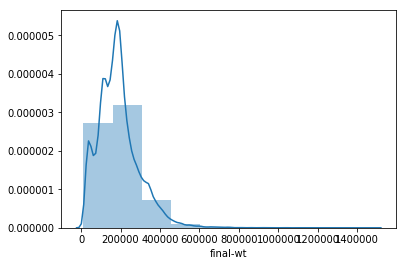

In [37]:
sns.distplot(train['final-wt'], kde=True, bins=10)

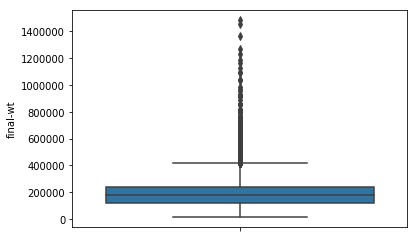

In [38]:
sns.boxplot(y='final-wt', data=train)

From above plots, 'final-wt' has mean of just ~200k and 3rd quartile is approx 400k and above that are outliers mostly. 

**3. Education-num**

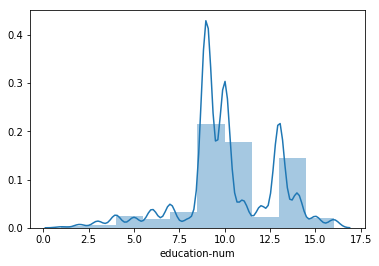

In [39]:
sns.distplot(train['education-num'], kde=True, bins=10)

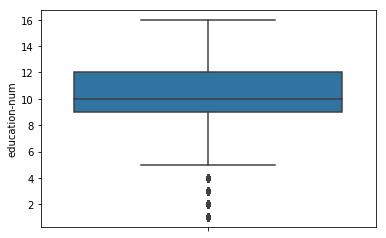

In [40]:
sns.boxplot(y='education-num', data=train)

'education-num' seems to be noisy and has outliers on min side. 

**4. Capital-gain**

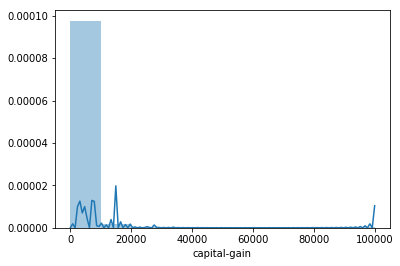

In [41]:
sns.distplot(train['capital-gain'], kde=True, bins=10)

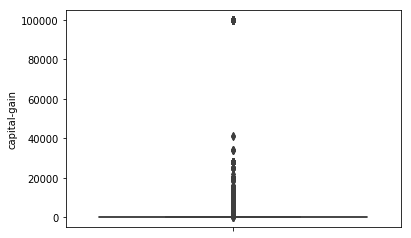

In [42]:
sns.boxplot(y='capital-gain', data=train)

'capital-gain' seems to be irrelevant data as its mean is almost zero. 

**5. Capital-loss**

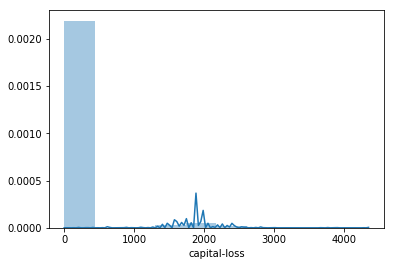

In [43]:
sns.distplot(train['capital-loss'], kde=True, bins=10)

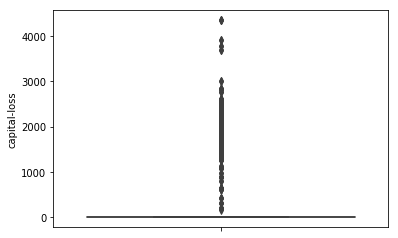

In [44]:
sns.boxplot(y='capital-loss',data=train)

'capital-loss' also seems to be irrelevant as it has mean to be almost 0. 

**6. Hrs-per-week**

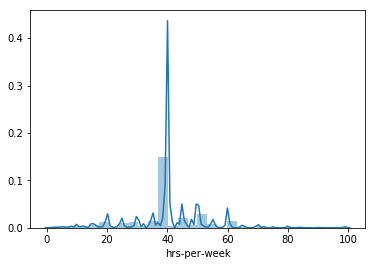

In [45]:
sns.distplot(train['hrs-per-week'], kde=True, bins=30)

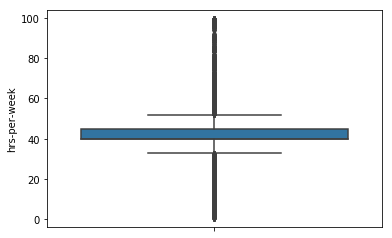

In [46]:
sns.boxplot(y='hrs-per-week', data=train)

'hrs-per-week' col seems to be irrelevant as it has also outliers on min and max sides. 

**Final continuous variables**

In [54]:
continuous_cols = ['age', 'final-wt', 'education-num']

### 4.2 Multivariate analysis

#### 4.2.1 Categorical vs target

#### 4.2.2 Continuous vs target

#### 4.2.3 Categorical vs categorical

#### 4.

### 4.3 Final columns to be considered for analysis

1. Categorical Columns
  1. education-new
  2. marital-status-new
  3. occupation
  4. relationship
  5. sex
2. Continuous Columns  
  1. age
  2. final-wt
  3. education-num

In [58]:
# categorical_cols = ['education-new','marital-status-new','occupation','relationship','sex']
# continuous_cols = ['age', 'final-wt', 'education-num']

print('Categorical columns: {0}'.format(categorical_cols))
print('Continuous columns: {0}'.format(continuous_cols))
final_cols = categorical_cols + continuous_cols
print('Final columns: {0}'.format(final_cols))

Categorical columns: ['education-new', 'marital-status-new', 'occupation', 'relationship', 'sex']
Continuous columns: ['age', 'final-wt', 'education-num']
Final columns: ['education-new', 'marital-status-new', 'occupation', 'relationship', 'sex', 'age', 'final-wt', 'education-num']
